**Consult the README.md for installation instructions.**

In [46]:
from flagcomplexSvg import FlagComplexSvg, FlagTesselatorSvg
from flagcomplex.ProjGeometryUtility import transform_four_points
import numpy as np
import copy

# Eruption flow on the tesselation of a four-tuple of flags
Most of what we do here is analogous to the `tutorial-flag-4tuple-eruption-flow.ipynb`. However, in this tutorial, we will also tesselate the complex, and look at the transformation of the tesselation.
## Setup

In [47]:
fcomplex = FlagComplexSvg()

#other_points = [np.array([100, 100, 100]), np.array([100, -100, 100]), np.array([-100, -100, 100]), np.array([-100, 100, 100])]
#p0 = np.array([0, 100, 100])
#q0 = other_points[0]

#p1 = np.array([100, 0, 100])
#q1 = other_points[1]

#p2 = np.array([0, -100, 100])
#q2 = other_points[2]

#p3 = np.array([-100, 0, 100])
#q3 = other_points[3]


p0 = np.array([292.75      , 107.19999695, 100.        ])
p1 = np.array([468.75      , 221.19999695, 100.        ])
p2 = np.array([329.75      , 296.20001221, 100.        ])
p3 = np.array([146.75      , 222.19999695, 100.        ])
q0 = np.array([-4.69093168e+08, -3.58196522e+08, -3.26950029e+08])
q1 = np.array([8.42531086e+08, 1.90862185e+08, 1.82580029e+08])
q2 = np.array([5.68916491e+08, 3.50633350e+08, 1.20240019e+08])
q3 = np.array([-3.20797029e+08, -6.49864884e+08, -2.15200019e+08])

other_points = [copy.deepcopy(q0), copy.deepcopy(q1), copy.deepcopy(q2), copy.deepcopy(q3)]

fcomplex.add_flag(p0,q0)
fcomplex.add_flag(p1,q1)
fcomplex.add_flag(p2,q2)
fcomplex.add_flag(p3,q3)

fcomplex.set_projection_plane(np.array([0,0,1]))

fcomplex1 = copy.deepcopy(fcomplex)
ftesselator1 = FlagTesselatorSvg(fcomplex1, steps = 3)

style = "Q"

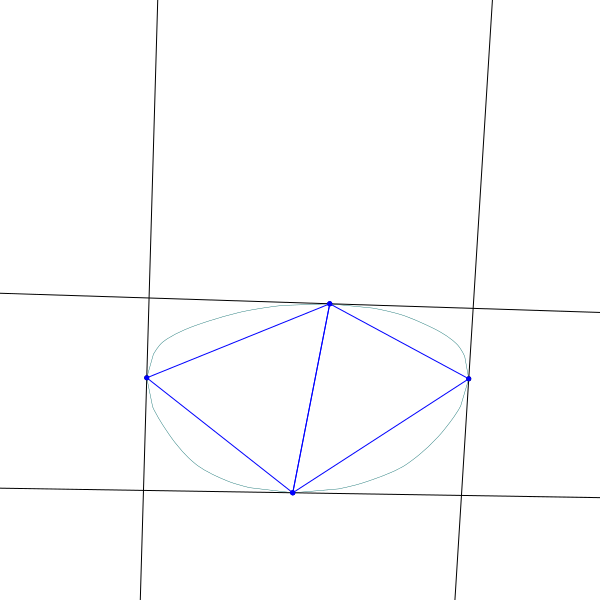

In [48]:
import drawSvg as draw

origin=(0, 0)
d = draw.Drawing(600, 600, origin=origin)
d.append(draw.Rectangle(0, 0, 600, 600, fill='#ffffff'))


fcomplex.create_triangulation()
fcomplex.draw_complex()

ftesselator = FlagTesselatorSvg(fcomplex, steps = 3)
d1 = copy.deepcopy(d)
ftesselator.print_image(old = d1, with_tiles = False, with_initial=False)
fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label= False)

d1.savePng("ef_4_tesselation.png")
d1

## Parameters (t, t)

In [49]:
steps=200
step_width = 0.1

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

fcomplex.erupt_complex_along_triangle(t=+10.1, triangle=triangle1, transformation_style=style)
fcomplex.erupt_complex_along_triangle(t=-10.1, triangle=triangle0, transformation_style=style)

style = "Q"

for r in range(1, steps):
    fcomplex.erupt_complex_along_triangle(t= -step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t= +step_width, triangle=triangle0, transformation_style=style)
    fcomplex.projective_transformation = transform_four_points(fcomplex.qs, [other_points[i-1] for i in range(4)])
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = False, fill_convex = False)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)
    
    d1.append(draw.Text(str(r), 20, 20, 20, center=0, fill='red'))

    d1.savePng("./temp/ef4tessplus_" + str(r) + ".png")

In [50]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessplus_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
# animation.write_videofile("eruption_flow_4tuple_tess_plusplus.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)

t:   8%|▊         | 15/200 [00:00<00:01, 143.73it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Parameters (-t, t)
### Normal visualization

In [29]:
fcomplex = copy.deepcopy(fcomplex1)
ftesselator = FlagTesselatorSvg(fcomplex, steps=4)

steps=100
step_width = 0.1

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

style = "Q"

for r in range(1, steps):
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t= -step_width, triangle=triangle0, transformation_style=style)
    fcomplex.projective_transformation = transform_four_points(fcomplex.qs, [other_points[i-1] for i in range(4)])
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = True, fill_convex = False)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)

    d1.savePng("./temp/ef4tessminus_" + str(r) + ".png")

KeyboardInterrupt: 

In [ ]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessminus_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
animation.write_videofile("eruption_flow_4tuple_tess_minusplus.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)

### Visualization without tiles

In [ ]:
fcomplex = copy.deepcopy(fcomplex1)
ftesselator = FlagTesselator(fcomplex, steps=4)

steps=180
step_width = 0.04

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

style = "Q"

for r in range(1, steps):
    print(r)
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t= -step_width, triangle=triangle0, transformation_style=style)
    fcomplex.projective_transformation = transform_four_points(fcomplex.qs, [other_points[i-1] for i in range(4)])
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = False, fill_convex = True, with_initial = False)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)

    d1.savePng("./temp/ef4tessminus_notiles_" + str(r) + ".png")

In [ ]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessminus_notiles_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
animation.write_videofile("eruption_flow_4tuple_tess_minusplus_notiles.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)

### Visualization without transformation to initial situation

In [ ]:
fcomplex = copy.deepcopy(fcomplex1)
ftesselator = FlagTesselator(fcomplex, steps=4)

steps=100
step_width = 0.04

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

style = "Q"

for r in range(1, steps):
    print(r)
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t= -step_width, triangle=triangle0, transformation_style=style)
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = False, fill_convex = True, with_initial = True)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)

    d1.savePng("./temp/ef4tessminus_notransform_" + str(r) + ".png")

In [ ]:
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessminus_notransform_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
animation.write_videofile("eruption_flow_4tuple_tess_minusplus_notransform.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)